# Pipeline (Feature_engineering)

In [ ]:
import pandas as pd

In [ ]:
import joblib
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_csv('super_wine_set_clean.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

vinho                      0
preço                      0
comentário_do_sommelier    0
uva                        0
país                       0
região                     0
classificação              0
vinícola                   0
teor_alcoólico             0
temperatura_de_serviço     0
olfativo                   0
visual                     0
gustativo                  0
harmonização               0
dtype: int64

In [ ]:
df['desc_detalhes'] = df['olfativo']+' '+df['gustativo']+' '+df['harmonização']

In [ ]:
df.drop(columns=['comentário_do_sommelier','olfativo','gustativo','harmonização'],inplace=True)

## Column transformer

In [ ]:
# Create a column transformer to apply different transformations to different columns
preprocessor = make_column_transformer(
    (OneHotEncoder(), ['país','classificação','vinícola']),
    (CountVectorizer(), 'uva'),
    (TfidfVectorizer(max_df=0.7,min_df=2), 'desc_detalhes'),
    (MinMaxScaler(), ['preço', 'teor_alcoólico','temperatura_de_serviço'])
)

tr_df = preprocessor.fit_transform(df)

In [ ]:
joblib.dump(preprocessor, 'column_transform.joblib')

['column_transform.joblib']

In [ ]:
vectorized_wine_matrix = pd.DataFrame(tr_df.toarray(),columns=preprocessor.get_feature_names_out(),index=df.vinho)

In [ ]:
vectorized_wine_matrix

,onehotencoder__país_alemanha,onehotencoder__país_alentejo,onehotencoder__país_argentina,onehotencoder__país_austrália,onehotencoder__país_brasil,onehotencoder__país_chile,onehotencoder__país_espanha,onehotencoder__país_estados unidos,onehotencoder__país_europeu,onehotencoder__país_frança,...,tfidfvectorizer__ácidos,tfidfvectorizer__água,tfidfvectorizer__álcool,tfidfvectorizer__óleo,tfidfvectorizer__ótima,tfidfvectorizer__ótimo,tfidfvectorizer__úmida,minmaxscaler__preço,minmaxscaler__teor_alcoólico,minmaxscaler__temperatura_de_serviço
vinho,,,,,,,,,,,,,,,,,,,,,
Arya Tinto 2021 Lata 269 mL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000401,0.029412,0.6875
Arya Rosé 2021 Lata 269 mL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000401,0.011765,0.2500
Paine Cabernet Sauvignon 2021 375 mL,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000801,0.035294,0.7500
Pueblo del Sol Tannat Rosé 2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001401,0.023529,0.3125
Baron Philippe de Rothschild Cabernet Sauvignon Carménère 2021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001151,0.035294,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Espumante Brasileiro Prosecco Brut AURORA Garrafa 750ml,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001531,0.017647,0.1875
Vinho Espumante Brasileiro TERRANOVA Moscatel Garrafa 750ml,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001531,0.823529,0.0625
Vinho Espumante Nacional CLUB DES SOMMELIERS Moscatel Garrafa 750ml,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001106,0.823529,0.1250


In [ ]:
vectorized_wine_matrix.to_csv('vectorized_wine_matrix.csv')

## Based on selected wines recommend

In [ ]:
perfil = pd.read_csv('../perfil/perfil_aguiar.csv')

In [ ]:
perfil

,name,evaluation
0,Don Simon Seleccion Tempranillo,-1
1,Santa Alicia Carménère Valle Central 2020,0
2,Vinho Português Tinto Periquita Reserva Garraf...,1
3,Vinho Mateus Rose 750ml,1
4,Vinho Frisante Salton Lunae Rose 750ml,1
5,Vinho Espumante Francês POL CLÉMENT Demi Sec G...,1
6,"Vinho Português Tinto Periquita Garrafa 1,5 L",1


In [ ]:
# Filtra dataframe e atributos de vinhos que mais gosto, estes previamente registrados

preferidos = perfil.loc[perfil['evaluation']==1,'name'].to_list()

vector_preferido = vectorized_wine_matrix.loc[vectorized_wine_matrix.index.isin(preferidos)]

In [ ]:
vector_preferido 

,onehotencoder__país_alemanha,onehotencoder__país_alentejo,onehotencoder__país_argentina,onehotencoder__país_austrália,onehotencoder__país_brasil,onehotencoder__país_chile,onehotencoder__país_espanha,onehotencoder__país_estados unidos,onehotencoder__país_europeu,onehotencoder__país_frança,...,tfidfvectorizer__ácidos,tfidfvectorizer__água,tfidfvectorizer__álcool,tfidfvectorizer__óleo,tfidfvectorizer__ótima,tfidfvectorizer__ótimo,tfidfvectorizer__úmida,minmaxscaler__preço,minmaxscaler__teor_alcoólico,minmaxscaler__temperatura_de_serviço
vinho,,,,,,,,,,,,,,,,,,,,,
"Vinho Português Tinto Periquita Reserva Garrafa 1,5 L",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010036,0.035294,0.6875
"Vinho Português Tinto Periquita Garrafa 1,5 L",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005783,0.035294,0.6250
Vinho Espumante Francês POL CLÉMENT Demi Sec Garrafa 750ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003445,0.005882,0.5625


In [ ]:
# Filtra dataframe e atributos de vinhos que menos gosto, estes previamente registrados

preferidos = perfil.loc[perfil['evaluation']==-1,'name'].to_list()

vector_ruim = vectorized_wine_matrix.loc[vectorized_wine_matrix.index.isin(preferidos)]

In [ ]:
vector_ruim

,onehotencoder__país_alemanha,onehotencoder__país_alentejo,onehotencoder__país_argentina,onehotencoder__país_austrália,onehotencoder__país_brasil,onehotencoder__país_chile,onehotencoder__país_espanha,onehotencoder__país_estados unidos,onehotencoder__país_europeu,onehotencoder__país_frança,...,tfidfvectorizer__ácidos,tfidfvectorizer__água,tfidfvectorizer__álcool,tfidfvectorizer__óleo,tfidfvectorizer__ótima,tfidfvectorizer__ótimo,tfidfvectorizer__úmida,minmaxscaler__preço,minmaxscaler__teor_alcoólico,minmaxscaler__temperatura_de_serviço
vinho,,,,,,,,,,,,,,,,,,,,,
Don Simon Seleccion Tempranillo,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.365853,0.0,0.000889,0.023529,0.75


In [76]:
def make_recommendation(dataset, matrix_wines,perfil, top=4):
    
    """
    Receives dataframes and return top n-wines most similar with good wines.
    Evaluate and return just wines well defined, with good_score>bad_score.
    
    
    good_score ->cosin_similarity of most liked wines against dataset of all wines.
    bad_score ->cosin_similarity of not liked wines against dataset of all wines.
    
    - dataset: contains all wines attributes and come from scraping wine marketplaces.
    
    - matrix_wines: it's a dataset treated and transformed with column_transformer.
    
    - perfil: It's contains name of wines and Most liked (1) / least liked (-1)
    this is used in similarity score.
    
    """
    
    preferidos = perfil.loc[perfil['evaluation']==1,'name'].to_list()
    vector_preferido = matrix_wines.loc[matrix_wines.index.isin(preferidos)]
    
    
    ruim = perfil.loc[perfil['evaluation']==-1,'name'].to_list()
    vector_ruim = matrix_wines.loc[matrix_wines.index.isin(ruim)]

    good = pd.DataFrame(vector_preferido.mean(axis=0)).T
    bad = pd.DataFrame(vector_ruim.mean(axis=0)).T

    print(len(ruim))

    print(bad.shape)

    #Matrix of wines without choosed elements from users.

    #matrix_wines_wv = matrix_wines

    if bad.shape[0] >1:

        matrix_wines_wv = matrix_wines.loc[~(matrix_wines.index.isin(preferidos))]
        matrix_wines_wv = matrix_wines_wv.loc[~(matrix_wines_wv.index.isin(ruim))]
    
    else:

        matrix_wines_wv = matrix_wines.loc[~(matrix_wines.index.isin(preferidos))]

    similarity_good = cosine_similarity(matrix_wines_wv,good)

    recommended = pd.DataFrame(similarity_good, index=matrix_wines_wv.index, columns=['cos_score_good'])

    if bad.shape[0] >1:

        similarity_bad = cosine_similarity(matrix_wines_wv,bad)

        recommended['cos_score_bad'] = similarity_bad 

        recommended.sort_values(by='cos_score_good',ascending=False,inplace=True)

        # Just a "sanity check", if cos_score_bad > cos_score_good exclude 

        recommended = recommended.loc[recommended['cos_score_good']>recommended['cos_score_bad']]

    top_recommended = recommended.head(top)

    #return top_recommended

    return pd.concat([top_recommended,dataset.loc[dataset.index.isin(top_recommended.index.to_list())]],axis=1)

In [53]:
df

,vinho,preço,uva,país,região,classificação,vinícola,teor_alcoólico,temperatura_de_serviço,visual,desc_detalhes
0,Arya Tinto 2021 Lata 269 mL,23.41,merlot pinot noir cabernet franc cabernet sauv...,brasil,serra gaúcha,seco,arya wines,12.5,15.0,rubi,frutado sobretudo frutas vermelhas ameixas cer...
1,Arya Rosé 2021 Lata 269 mL,23.41,pinot noir merlot trebbiano,brasil,serra gaúcha,seco,arya wines,11.0,8.0,rosa cereja pálido,frutas vermelhas especialmente morangos maduro...
2,Paine Cabernet Sauvignon 2021 375 mL,32.82,cabernet sauvignon,chile,valle central,seco,vyf wines,13.0,16.0,rubi,aromas frutas negras vermelhas herbáceo vinho ...
4,Pueblo del Sol Tannat Rosé 2021,46.94,tannat,uruguai,canelones,seco,pueblo del sol,12.0,9.0,rosa claro,frutas vermelhas fresca morango cereja vinho j...
5,Baron Philippe de Rothschild Cabernet Sauvigno...,41.06,cabernet sauvignon carménère,chile,valle central,seco,baron philippe de rothschild,13.0,16.0,rubi,frutas pretas ameixa groselha amora notas espe...
...,...,...,...,...,...,...,...,...,...,...,...
1963,Espumante Brasileiro Prosecco Brut AURORA Garr...,49.99,prosecco,brasil,serra gaúcha,tinto,vinícola aurora,11.5,7.0,claro tonalidades esverdeadas,fresco frutado leve acidez equilibrada risotos...
1964,Vinho Espumante Brasileiro TERRANOVA Moscatel ...,49.99,moscatel,brasil,vale do são francisco,espumante,miolo,80.0,5.0,cor clara perlage fino intenso persistente ter...,aroma intenso fresco típico notas jasmim outra...
1965,Vinho Espumante Nacional CLUB DES SOMMELIERS M...,39.99,moscato,brasil,rio grande do sul,espumante,vinícola salton,80.0,6.0,brilhante coloração claro esverdeada grande de...,apresenta aromas flores brancas cítricos maçã ...
1966,Champagne Francês Branco Brut Veuve Clicquot P...,499.99,pinot noir pinot meunier chardonnay,frança,reims champagne,champagne,veuve clicquot,12.0,9.0,amarelo dourado perlage fino consistente obtid...,aroma complexo persistência aromática brut ofe...


In [69]:
perfil.loc[~(perfil['evaluation']==-1)]

,name,evaluation
1,Santa Alicia Carménère Valle Central 2020,0
2,Vinho Português Tinto Periquita Reserva Garraf...,1
3,Vinho Mateus Rose 750ml,1
4,Vinho Frisante Salton Lunae Rose 750ml,1
5,Vinho Espumante Francês POL CLÉMENT Demi Sec G...,1
6,"Vinho Português Tinto Periquita Garrafa 1,5 L",1


In [77]:
make_recommendation(df, vectorized_wine_matrix,perfil.loc[~(perfil['evaluation']==-1)], top=10)

0
(1, 2466)


,cos_score_good,vinho,preço,uva,país,região,classificação,vinícola,teor_alcoólico,temperatura_de_serviço,visual,desc_detalhes
Arya Tinto 2021 Lata 269 mL,0.104745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arya Rosé 2021 Lata 269 mL,0.043544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paine Cabernet Sauvignon 2021 375 mL,0.162521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pueblo del Sol Tannat Rosé 2021,0.051627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baron Philippe de Rothschild Cabernet Sauvignon Carménère 2021,0.149668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viña Carrasco D.O. Valle Central Carménère 2022,0.108184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finca Dorada Selección Especial Merlot 2021,0.105509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frisante Pontebello Lambrusco I.G.T. dellEmilia Bianco Amabile,0.033513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altos del Condor Blanco 2021,0.202957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pueblo del Sol Cabernet Sauvignon 2021,0.157066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
matrix_wines = vectorized_wine_matrix
good = pd.DataFrame(vector_preferido.mean(axis=0)).T
bad = pd.DataFrame(vector_ruim.mean(axis=0)).T

matrix_wines_wv = matrix_wines.loc[~((matrix_wines.index.isin(good.index.to_list()))|(matrix_wines.index.isin(bad.index.to_list())))]#Matrix of wines without choosed elements from users.

similarity_good = cosine_similarity(matrix_wines_wv,good)

recommended = pd.DataFrame(similarity_good, index=matrix_wines_wv.index, columns=['cos_score_good'])

similarity_bad = cosine_similarity(matrix_wines_wv,bad)

recommended['cos_score_bad'] = similarity_bad 

recommended.sort_values(by='cos_score_good',ascending=False,inplace=True)

# Just a "sanity check", if cos_score_bad > cos_score_good exclude 

recommended = recommended.loc[recommended['cos_score_good']>recommended['cos_score_bad']]

top_recommended = recommended.head(4)


NameError: name 'vector_ruim' is not defined

In [ ]:
df.loc[df['vinho'].isin(top_recommended.index.to_list())]

,vinho,preço,uva,país,região,classificação,vinícola,teor_alcoólico,temperatura_de_serviço,visual,desc_detalhes
1239,Vinho Português Tinto PERIQUITA Garrafa 750ml,89.99,castelão trincadeira aragonês,portugal,península de setúbal,tinto,josé maria da fonseca,13.0,17.0,vermelho rubi,frutas vermelhas flores delicado toque madeira...
1266,Vinho Português Tinto Meio Seco Reserva Periqu...,89.99,castelão touriga nacional touriga francesa,portugal,península de setúbal,tinto,josé maria da fonseca,13.0,15.0,vermelho rubi intenso,cassis mirtilo baunilha café macio equilibrado...
1423,Vinho Português Tinto Periquita Reserva Garraf...,249.99,castelão touriga nacional touriga francesa,portugal,península de setúbal,tinto,josé maria da fonseca,13.0,15.0,vermelho rubi intenso,frutas vermelhas negras toques florais baunilh...
1432,"Vinho Português Tinto Periquita Garrafa 1,5 L",149.99,castelão trincadeira aragonês,portugal,península de setúbal,tinto,josé maria da fonseca,13.0,14.0,vermelho rubi,frutas vermelhas flores delicado toque madeira...


<AxesSubplot: xlabel='vinho'>

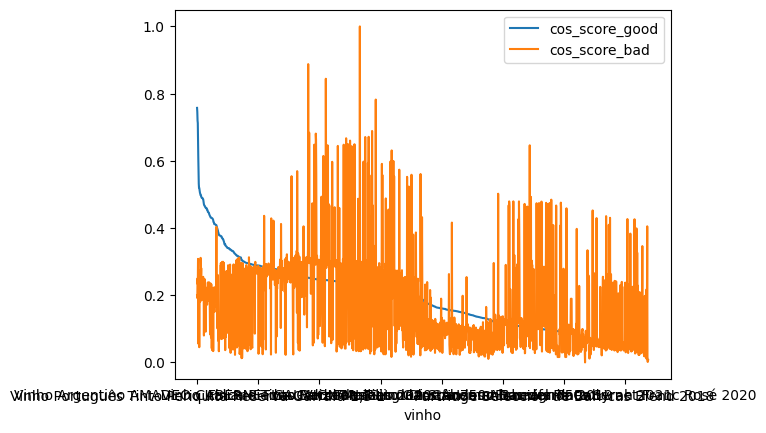

In [ ]:
recommended.plot(kind='line')

<AxesSubplot: xlabel='vinho'>

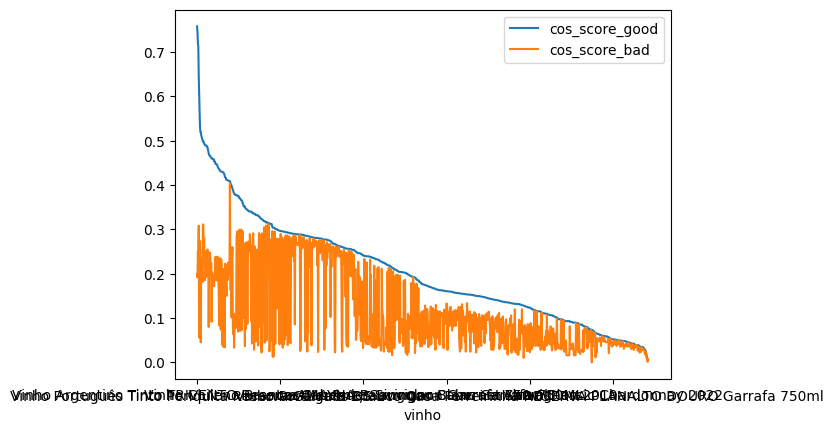

In [ ]:
recommended.loc[recommended['cos_score_good']>recommended['cos_score_bad']].plot(kind='line')

In [ ]:
recommended

,preço,uva,país,região,classificação,vinícola,teor_alcoólico,temperatura_de_serviço,visual,desc_detalhes
vinho,,,,,,,,,,
Arya Tinto 2021 Lata 269 mL,23.41,merlot pinot noir cabernet franc cabernet sauv...,brasil,serra gaúcha,seco,arya wines,12.5,15.0,rubi,frutado sobretudo frutas vermelhas ameixas cer...
Arya Rosé 2021 Lata 269 mL,23.41,pinot noir merlot trebbiano,brasil,serra gaúcha,seco,arya wines,11.0,8.0,rosa cereja pálido,frutas vermelhas especialmente morangos maduro...
Paine Cabernet Sauvignon 2021 375 mL,32.82,cabernet sauvignon,chile,valle central,seco,vyf wines,13.0,16.0,rubi,aromas frutas negras vermelhas herbáceo vinho ...
Pueblo del Sol Tannat Rosé 2021,46.94,tannat,uruguai,canelones,seco,pueblo del sol,12.0,9.0,rosa claro,frutas vermelhas fresca morango cereja vinho j...
Baron Philippe de Rothschild Cabernet Sauvignon Carménère 2021,41.06,cabernet sauvignon carménère,chile,valle central,seco,baron philippe de rothschild,13.0,16.0,rubi,frutas pretas ameixa groselha amora notas espe...
...,...,...,...,...,...,...,...,...,...,...
Espumante Brasileiro Prosecco Brut AURORA Garrafa 750ml,49.99,prosecco,brasil,serra gaúcha,tinto,vinícola aurora,11.5,7.0,claro tonalidades esverdeadas,fresco frutado leve acidez equilibrada risotos...
Vinho Espumante Brasileiro TERRANOVA Moscatel Garrafa 750ml,49.99,moscatel,brasil,vale do são francisco,espumante,miolo,80.0,5.0,cor clara perlage fino intenso persistente ter...,aroma intenso fresco típico notas jasmim outra...
Vinho Espumante Nacional CLUB DES SOMMELIERS Moscatel Garrafa 750ml,39.99,moscato,brasil,rio grande do sul,espumante,vinícola salton,80.0,6.0,brilhante coloração claro esverdeada grande de...,apresenta aromas flores brancas cítricos maçã ...


In [ ]:
similarity_good.shape

(1839, 3)

In [ ]:
similarity_scores = cosine_similarity(transformed_df.loc[transformed_df.index=='português tinto periquita'], transformed_df.loc[~(transformed_df.index=='português tinto periquita')])
print(similarity_scores)

## Pipeline and test new data

In [ ]:
new_data = pd.DataFrame({
    'país': ['Brasil', 'Argentina', 'Espanha'],
    'classificação': ['tinto', 'branco', 'rosé'],
    'vinícola': ['Vinícola 1', 'Vinícola 2', 'Vinícola 4'],
    'uva': ['cabernet sauvignon', 'chardonnay', 'syrah'],
    'desc_detalhes': ['Este vinho tinto é encorpado e tem notas de frutas escuras', 'Este vinho branco é leve e tem notas cítricas', 'Este vinho rosé é seco e tem notas de morango'],
    'preço': [55, 35, 25],
    'teor_alcoólico': [14, 11, 12.5],
    'temperatura_de_serviço': [16, 8, 12]})

In [ ]:
#df['vinho'] = df['vinho'].apply(tp.wine_clean)
#df['vinho'] = df['vinho'].apply(tp.remove_stopwords)

df[['comentário_do_sommelier','uva','olfativo','visual','gustativo','harmonização']] = df[['comentário_do_sommelier','uva','olfativo','visual','gustativo','harmonização']].applymap(tp.remove_stopwords)

df[['país', 'região','classificação', 'vinícola']] = df[['país', 'região','classificação', 'vinícola']].applymap(tp.clean_text)

df['uva'].apply(tp.remove_stopwords)

df['teor_alcoólico'] = df['teor_alcoólico'].apply(tp.clean_teor)

df['temperatura_de_serviço'] = df['temperatura_de_serviço'].apply(tp.extract_numbers_and_average)

KeyError: "['comentário_do_sommelier', 'olfativo', 'gustativo', 'harmonização'] not in index"

In [ ]:
similarity_scores = cosine_similarity(transformed_df.loc[transformed_df.index=='português tinto periquita'], transformed_df.loc[~(transformed_df.index=='português tinto periquita')])
print(similarity_scores)

NameError: name 'transformed_df' is not defined

In [ ]:
results = pd.DataFrame(similarity_scores.reshape(-1,1),index=transformed_df.loc[~(transformed_df.index=='português tinto periquita')].index,columns=['scores'])

In [ ]:
df.loc[df.vinho.isin(['português tinto periquita','casa portuguesa regional península setúbal tinto','português tinto convento serra'])]

In [ ]:
results.sort_values(by='scores',ascending=False).head(10)

In [ ]:
similarity_scores

In [ ]:
transformed_df.loc[transformed_df.index=='português tinto periquita']

In [ ]:
transformed_df.loc[transformed_df.index.str.contains('periquita')]

In [ ]:
preprocessor.transform(new_data)

In [ ]:
# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(transformed_df.toarray(), columns=vectorizer.get_feature_names_out(),index=df['comentário_do_sommelier'])

tfidf_df.head()

In [ ]:
transformed_df

In [ ]:
transformed_df

In [ ]:
preprocessor

In [ ]:
país---> one_hot_encoding
classificação ----> one_hot_encoding
vinho ----> word_cloud ?
uva ----> word_cloud ?
vinícola ---> word_cloud ?
outros ----> td_idf
preço ----> min_max
teor_alcoólico ----> min_max
temperatura_de_serviço ----> min_max

In [ ]:
df.dropna(inplace=True)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(df['vinho'])

In [ ]:
print(X.toarray())

In [ ]:
df